In [54]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.regularizers import l2

In [55]:
# Load and preprocess the data
max_features = 10_000  # 400 -> 10_000
maxlen = 500

In [56]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [57]:
# Define the LSTM model
model = Sequential()

model.add(Embedding(max_features, 128))  # 32 -> 128
model.add(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01)))  # 4 -> 64, return_sequences=True
model.add(Dropout(0.5))  # Nueva capa Dropout 
model.add(LSTM(32))  # Nueva capa LSTM
model.add(Dropout(0.5))  # Nueva capa Dropout

model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=5, 
    batch_size=64, 
    validation_data=(X_test, y_test)
)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 290ms/step - accuracy: 0.6448 - loss: 1.0922 - val_accuracy: 0.8226 - val_loss: 0.4310
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 291ms/step - accuracy: 0.8376 - loss: 0.4017 - val_accuracy: 0.8463 - val_loss: 0.3666
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 292ms/step - accuracy: 0.8974 - loss: 0.2745 - val_accuracy: 0.8578 - val_loss: 0.3719
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 293ms/step - accuracy: 0.9244 - loss: 0.2209 - val_accuracy: 0.8648 - val_loss: 0.3266
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 294ms/step - accuracy: 0.9380 - loss: 0.1888 - val_accuracy: 0.8682 - val_loss: 0.3763


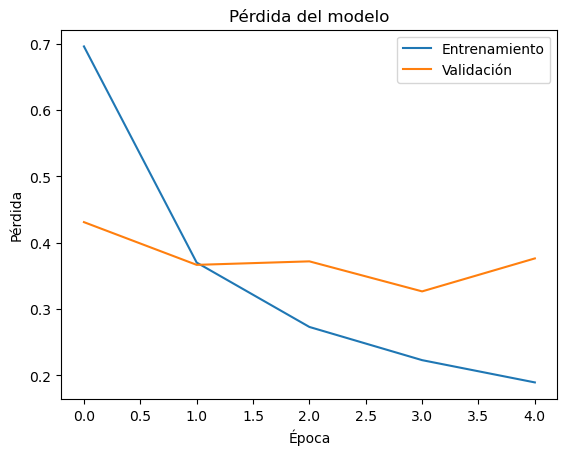

In [59]:
# Graficar la pérdida
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [60]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.8679 - loss: 0.3740
Loss: 0.3762916326522827, Accuracy: 0.8681600093841553


782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

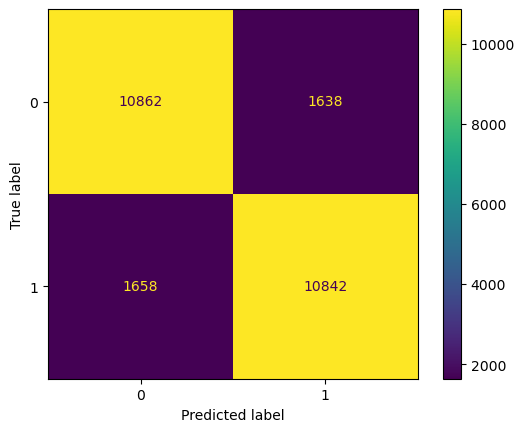

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix


En comparación a la red original, se puede observar una mejora notable en la accuracy de entrenamiento y validación. En la matriz de confusión se observa claramente la disminución de falsos positivos y falsos negativos, siendo estos últimos los que más disminuyeron.